In [1]:
import numpy as np
import matplotlib.pyplot as plt
from roborl.ddpg.random_process import OrnsteinUhlenbeckProcess

In [2]:
class ActionNoise(object):
    def reset(self):
        pass

class OrnsteinUhlenbeckActionNoise(ActionNoise):
    def __init__(self, mu, sigma, theta=.15, dt=1e-2, x0=None):
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
        self.dt = dt
        self.x0 = x0
        self.reset()

    def __call__(self):
        x = self.x_prev + self.theta * (self.mu - self.x_prev) * self.dt + self.sigma * np.sqrt(self.dt) * np.random.normal(size=self.mu.shape)
        self.x_prev = x
        return x

    def reset(self):
        self.x_prev = self.x0 if self.x0 is not None else np.zeros_like(self.mu)

    def __repr__(self):
        return 'OrnsteinUhlenbeckActionNoise(mu={}, sigma={})'.format(self.mu, self.sigma)

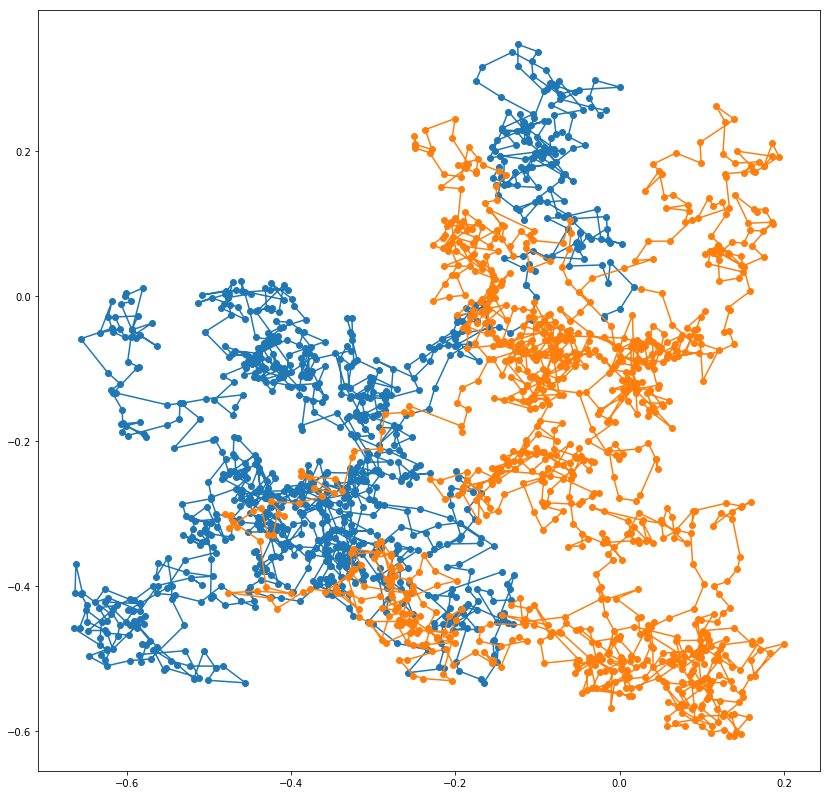

In [3]:
our_process = OrnsteinUhlenbeckProcess(2)
openai_process = OrnsteinUhlenbeckActionNoise(np.array([0, 0]), 0.2)
our_samples = []
openai_samples = []
for i in range(1000):
    our_samples.append(our_process.sample())
    openai_samples.append(openai_process())
    
our_samples = np.array(our_samples)
openai_samples = np.array(openai_samples)

plt.figure(figsize=(14,14))
plt.plot(our_samples[:,0], our_samples[:,1], marker="o")
plt.plot(openai_samples[:,0], openai_samples[:,1], marker="o")